# Merge and Insights
En este notebook se va a realizar la unión de los datasets de campañas bancarias (`bank-additional.csv`) y detalles de clientes (`customer-details.csv`)

In [1]:
#Tratamiento de datos
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Exploracion de archivos
import sys
sys.path.append('../')

#Funciones personalizadas
from src import soporte_visualizacion as spv 

In [2]:
# Dataset bank
df_bank_o = pd.read_csv('../data/processed/02.data_limpios_no_nulos_bank.csv', index_col=0, parse_dates=['date'])

# Dataset customer
df_customer_o = pd.read_csv('../data/processed/01.data_limpios_customer.csv', parse_dates=['dt_customer'])


In [3]:
df_bank = df_bank_o.copy()
df_customer = df_customer_o.copy()


In [4]:
df = pd.merge(df_bank, df_customer, on='id', how='left')

In [5]:
nulos = df.isna().sum()
pct_nulos = (nulos / df.shape[0] * 100).round(2)
print("\nPorcentaje de nulos:\n", pct_nulos[pct_nulos>0])


Porcentaje de nulos:
 Series([], dtype: float64)


Vemos que no hay presencia de nulos, por lo que vamos a analizar ciertas variables.

## Variables numéricas vs suscripción (y)
 
Analizamos  lo siguiente:
- Si los clientes que contrataron el producto tienen mayor ingreso medio.
- Si los clientes con más tiempo en el banco, suscriben el producto o no.
- Si el número de visitas en la web afecta a la suscripción del producto.

    -  Variables analizadas:

        - income
        - customer_tenure_years
        - num_web_visits_month
        - y (suscripción)

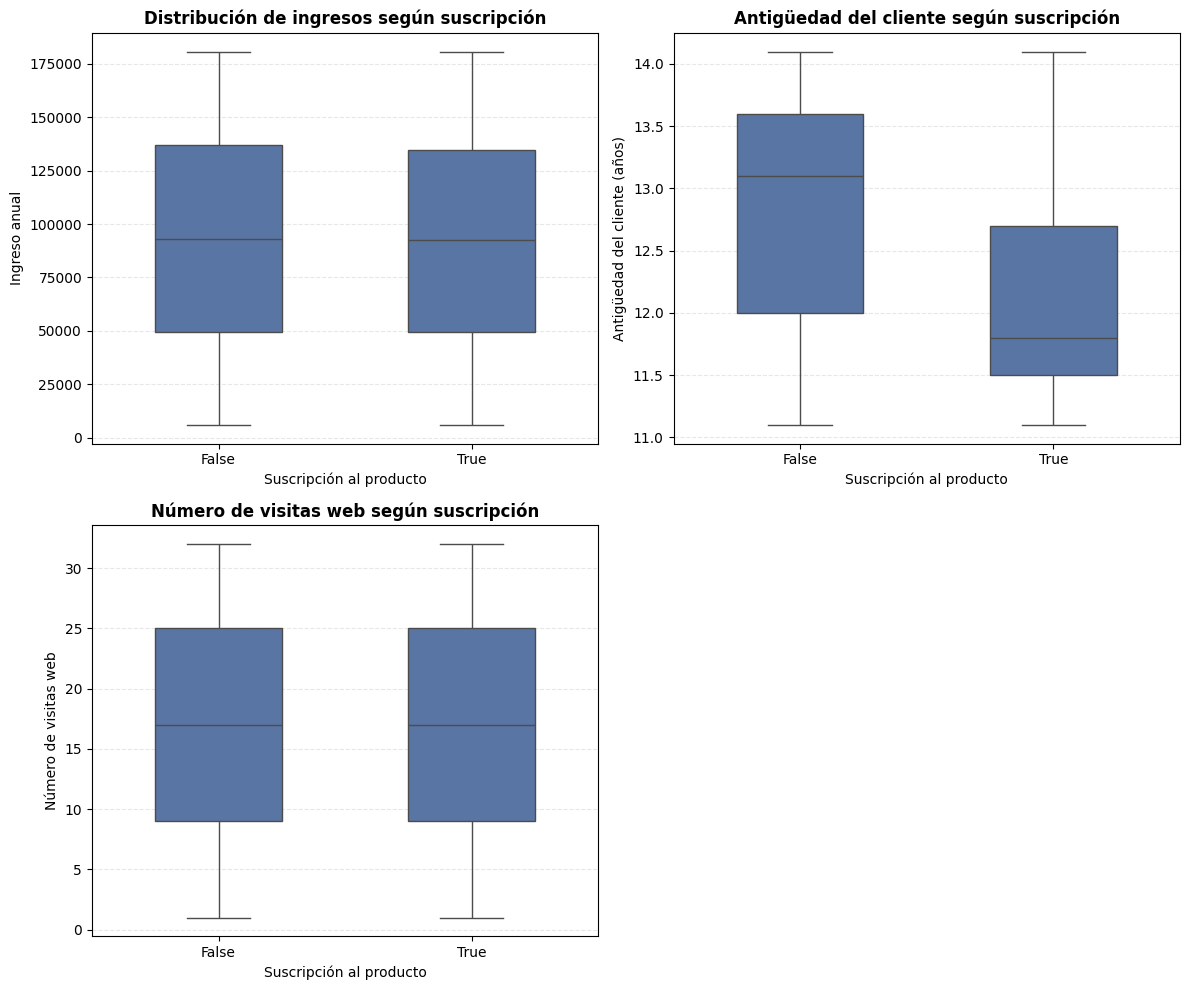

In [ ]:
num_cols = ['income', 'customer_tenure_years', 'num_web_visits_month']

title_map = {
    'income': 'Distribución de ingresos según suscripción',
    'customer_tenure_years': 'Antigüedad del cliente según suscripción',
    'num_web_visits_month': 'Número de visitas web según suscripción'
}

ylabel_map = {
    'income': 'Ingreso anual',
    'customer_tenure_years': 'Antigüedad del cliente (años)',
    'num_web_visits_month': 'Número de visitas web'
}

spv.plot_box_vs_target(df, num_cols, target='y', title_map=title_map, xlabel='Suscripción al producto', ylabel_map=ylabel_map)


## Conclusiones del EDA
A partir del análisis exploratorio realizado, no se identifican diferencias significativas en ingresos ni en comportamiento digital entre los clientes que suscriben el producto y los que no. La antigüedad del cliente muestra ligeras variaciones, pero no suficientes para considerarla un factor determinante. En conjunto, las variables analizadas no presentan un poder explicativo fuerte sobre la suscripción al producto, lo que sugiere que la decisión del cliente está más influida por factores relacionados con la campaña (como la duración de la llamada, el momento del contacto o el canal utilizado) que por características demográficas o económicas del cliente.